# Wumplot Word

## Importing libraries

In [59]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

## Game Parameters

In [60]:
number_of_wumpus = 10
number_of_holes = 10

## End Game

In [61]:
def end_game(dangers, pos):
    alive = True
    for danger_pos in dangers.T:
        if pos[0] == danger_pos[0] and pos[1] == danger_pos[1]:
            alive = False
            clear_output()
            plt.figure(figsize = (4,4))
            plt.plot(0,0, color = 'k', marker = 's', markersize = 3000)
            plt.axis('off')
            plt.title('WASTED')
            plt.show()
    return alive

## Win Game

In [62]:
def win_game(pos, treasure):
    win = False
    if sum(np.array(pos)==np.array(treasure))==2:
        win = True
        clear_output()
        plt.figure(figsize = (4,4))
        plt.plot(0,0, color = 'yellow', marker = 's', markersize = 3000)
        plt.axis('off')
        plt.title('WIN')
        plt.show()
    return win

## Displaying game

In [63]:
def plot_game(pos, wumpus, holes, treasure, width = 5, height = 5):
    clear_output()
    plt.figure(figsize = (4, 4))
    plt.plot([pos[0]], [pos[1]], linestyle ='', marker = 'x', markersize = 20, c = 'green')
    plt.plot([treasure[0]], [treasure[1]], linestyle ='', marker = 'o', markersize = 20, c = 'yellow')
    plt.plot([wumpus[0]], [wumpus[1]], linestyle = '', marker = 'x', markersize = 20, c = 'red')
    plt.plot([holes[0]], [holes[1]], linestyle = '', marker = 'o', markersize = 20, c = 'black')
    plt.xlim(-width-1, width+1)
    plt.ylim(-height-1, height+1)
    plt.axis('off')
    plt.show()

# The Game

The goal of this game is to reach the treasure : you are the green cross and you must reach the yellow square. Beware of the holes (black circles) and of the wumpus (red crosses). Oh and the wumpus move randomly...

Good luck !

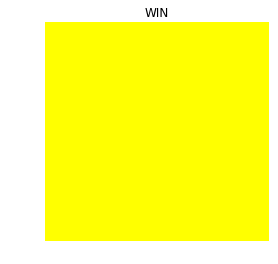

In [64]:

treasure = np.random.randint(low = -5, high = 6, size = 2)
pos = [0,0]
wumpus = np.random.randint(low = -5, high = 6, size = (2, number_of_wumpus))
holes = np.random.randint(low = -5, high= 6, size = (2, number_of_holes))
alive = True
win = False

while alive and not win:
    
    plot_game(pos, wumpus, holes, treasure)
    
    alive = end_game(wumpus, pos) and end_game(holes, pos) 
    if alive : win = win_game(pos, treasure)
    if alive and not win: 
        # moving the player
        direction = input('which direction? q/z/d/s and enter')
        if len(direction)<1:
            clear_output()
            continue
        else : 
            direction = direction[0]

        if   direction == 'z':
            pos[1] += 1
        elif direction == 's':
            pos[1] -= 1
        elif direction == 'q':
            pos[0] -= 1
        elif direction == 'd':
            pos[0] += 1
        else : break
        # moving wumpus
        wumpus += np.random.randint(low = -1, high = 2, size = (2,number_of_wumpus))
        wumpus = np.max([np.ones((2,number_of_wumpus))*-5, wumpus], axis = 0)
        wumpus = np.min([np.ones((2,number_of_wumpus))*5, wumpus], axis = 0)
    
    
        
        